# ![](DGC.jpg)

# import libraries and data sets

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

cabdata = pd.read_csv('Cab_Data.csv')
TranID = pd.read_csv('Transaction_ID.csv')
customerID = pd.read_csv('Customer_ID.csv')
citiesdata = pd.read_csv('City.csv')

# No of transaction to the cab companies

In [2]:
trans_count = cabdata['Company'].value_counts()
print(trans_count['Pink Cab'])
print(trans_count['Yellow Cab'])

84711
274681


# Calculate the revanue and profit

In [3]:
pink_cab = cabdata[cabdata['Company'] == 'Pink Cab']
yellow_cab = cabdata[cabdata['Company'] == 'Yellow Cab']

# Calculate revenue and profit for Pink Cab
pink_cab_revenue = pink_cab['Price Charged'].sum()
pink_cab_cost = pink_cab['Cost of Trip'].sum()
pink_cab_profit = pink_cab_revenue - pink_cab_cost

# Calculate revenue and profit for Yellow Cab
yellow_cab_revenue = yellow_cab['Price Charged'].sum()
yellow_cab_cost = yellow_cab['Cost of Trip'].sum()
yellow_cab_profit = yellow_cab_revenue - yellow_cab_cost

print('Pink Cab Revenue:', pink_cab_revenue)
print('Pink Cab Profit:', pink_cab_profit)

print('Yellow Cab Revenue:', yellow_cab_revenue)
print('Yellow Cab Profit:', yellow_cab_profit)

Pink Cab Revenue: 26328251.330000002
Pink Cab Profit: 5307328.321000002
Yellow Cab Revenue: 125853887.18999997
Yellow Cab Profit: 44020373.17079997


# Convert and Extract the date of time column

In [4]:
# Convert the 'Date of Travel' column to datetime
cabdata['Date of Travel'] = pd.to_datetime(cabdata['Date of Travel'])

# Extract year from the 'Date of Travel' column and create a new column 'Year'
cabdata['Year'] = cabdata['Date of Travel'].dt.year

# Calculate the revanue and profit by year

In [5]:
# Group data by company and year
pink_data = cabdata[cabdata['Company'] == 'Pink Cab']
pink_revenue = pink_data.groupby('Year')['Price Charged'].sum()
pink_cost = pink_data.groupby('Year')['Cost of Trip'].sum()
pink_profit = pink_revenue - pink_cost

yellow_data = cabdata[cabdata['Company'] == 'Yellow Cab']
yellow_revenue = yellow_data.groupby('Year')['Price Charged'].sum()
yellow_cost = yellow_data.groupby('Year')['Cost of Trip'].sum()
yellow_profit = yellow_revenue - yellow_cost

print('Pink Cab yearly revenue:\n', pink_revenue)
print('Pink Cab yearly profit:\n', pink_profit)

print('Yellow Cab yearly revenue:\n', yellow_revenue)
print('Yellow Cab yearly profit:\n', yellow_profit)

Pink Cab yearly revenue:
 Year
2016    7908479.23
2017    9578629.54
2018    8841142.56
Name: Price Charged, dtype: float64
Pink Cab yearly profit:
 Year
2016    1713511.224
2017    2033654.908
2018    1560162.189
dtype: float64
Yellow Cab yearly revenue:
 Year
2016    38481133.18
2017    45818910.04
2018    41553843.97
Name: Price Charged, dtype: float64
Yellow Cab yearly profit:
 Year
2016    1.392700e+07
2017    1.657598e+07
2018    1.351740e+07
dtype: float64


# Merge the data files to calculate the customers by Gender

In [ ]:
# df = pd.merge(customerID, TranID, on='Customer ID')
df = pd.merge(df, cabdata, on='Transaction ID')

groups = df.groupby(['Company', 'Gender'])

# Counting the number of male and female customers for each company
counts = groups['Transaction ID'].count()

# Extracting the counts for Pink Cab and Yellow Cab
pink_cab_counts = counts.loc['Pink Cab']
yellow_cab_counts = counts.loc['Yellow Cab']

# Printing the results
print("Pink Cab:\n", pink_cab_counts, "\n")
print("Yellow Cab:\n", yellow_cab_counts)

# Data processing task

In [8]:
citiesdata['Population'] = citiesdata['Population'].str.replace(',', '').astype(int)
citiesdata['Users'] = citiesdata['Users'].str.replace(',', '').astype(int)

cabdata['KM Travelled'] = cabdata['KM Travelled'].round(2)

# Merge the data files for calculations

In [9]:
# merge transaction_df with cab_df on Transaction ID
transaction_cab_df = pd.merge(TranID, cabdata, on='Transaction ID')

# merge transaction_cab_df with city_df on City
transaction_cab_city_df = pd.merge(transaction_cab_df, citiesdata, on='City')

# merge transaction_cab_city_df with customer_df on Customer ID
final_df = pd.merge(transaction_cab_city_df, customerID, on='Customer ID')

final_df['Year'] = pd.to_datetime(final_df['Date of Travel']).dt.year

# calculate the distance covered for each trip
final_df['Distance Covered'] = final_df['KM Travelled']


# City wise user covered by pink and yellow cab

In [10]:
# create a pivot table to get city-wise cab user covered by Pink Cab and Yellow Cab
pivot_table1 = pd.pivot_table(final_df, values='Customer ID', index='City', columns='Company', aggfunc=pd.Series.nunique)
print('\nCity-wise cab user covered by Pink Cab and Yellow Cab:')
print(pivot_table1)


City-wise cab user covered by Pink Cab and Yellow Cab:
Company         Pink Cab  Yellow Cab
City                                
ATLANTA GA          1322        2595
AUSTIN TX           1354        1914
BOSTON MA           2463        2997
CHICAGO IL          2859        3000
DALLAS TX           1118        2564
DENVER CO           1145        1681
LOS ANGELES CA      2996        2998
MIAMI FL            1480        2334
NASHVILLE TN        1356         965
NEW YORK NY         2972        3000
ORANGE COUNTY       1198        1712
PHOENIX AZ           763         994
PITTSBURGH PA        604         574
SACRAMENTO CA       1078         880
SAN DIEGO CA        2909        2886
SEATTLE WA          1790        2486
SILICON VALLEY      2130        2382
TUCSON AZ            684         934
WASHINGTON DC       2109        3000


# Yearly distance covered by pink and yellow cab

In [11]:
pivot_table2 = pd.pivot_table(final_df, values='Distance Covered', index='Year', columns='Company', aggfunc='sum')
print('\nYearly distance covered by Pink Cab and Yellow Cab:')
print(pivot_table2)


Yearly distance covered by Pink Cab and Yellow Cab:
Company   Pink Cab  Yellow Cab
Year                          
2016     563509.67  1859978.21
2017     685823.52  2214879.02
2018     661739.92  2124560.24


# Year wise customer covered ny pink and Yellow Cabs

In [12]:
pivot_table3 = pd.pivot_table(final_df, values='Customer ID', index='Year', columns='Company', aggfunc=pd.Series.nunique)
print('\nYear-wise customer covered by Pink Cab and Yellow Cab:')
print(pivot_table3)


Year-wise customer covered by Pink Cab and Yellow Cab:
Company  Pink Cab  Yellow Cab
Year                         
2016        16661       25937
2017        18643       27789
2018        18400       27470


# Calculate Revanue and profir growth for both cab companies

In [13]:
# Filter data for Pink Cab and Yellow Cab
pink_cab_data = cabdata[cabdata['Company'] == 'Pink Cab']
yellow_cab_data = cabdata[cabdata['Company'] == 'Yellow Cab']

# Convert the 'Date of Travel' column to datetime
pink_cab_data['Date of Travel'] = pd.to_datetime(pink_cab_data['Date of Travel'])
yellow_cab_data['Date of Travel'] = pd.to_datetime(yellow_cab_data['Date of Travel'])

# Extract year from the 'Date of Travel' column and create a new column 'Year'
pink_cab_data['Year'] = pink_cab_data['Date of Travel'].dt.year
yellow_cab_data['Year'] = yellow_cab_data['Date of Travel'].dt.year

# Calculate revenue and profit for Pink Cab by year
pink_cab_revenue_by_year = pink_cab_data.groupby('Year')['Price Charged'].sum()
pink_cab_cost_by_year = pink_cab_data.groupby('Year')['Cost of Trip'].sum()
pink_cab_profit_by_year = pink_cab_revenue_by_year - pink_cab_cost_by_year

# Calculate revenue and profit for Yellow Cab by year
yellow_cab_revenue_by_year = yellow_cab_data.groupby('Year')['Price Charged'].sum()
yellow_cab_cost_by_year = yellow_cab_data.groupby('Year')['Cost of Trip'].sum()
yellow_cab_profit_by_year = yellow_cab_revenue_by_year - yellow_cab_cost_by_year

# Calculate revenue and profit growth for Pink Cab by year
pink_cab_revenue_growth = pink_cab_revenue_by_year.pct_change() * 100
pink_cab_profit_growth = pink_cab_profit_by_year.pct_change() * 100

# Calculate revenue and profit growth for Yellow Cab by year
yellow_cab_revenue_growth = yellow_cab_revenue_by_year.pct_change() * 100
yellow_cab_profit_growth = yellow_cab_profit_by_year.pct_change() * 100

# Print the results
print('Pink Cab Revenue Growth:\n', pink_cab_revenue_growth)
print('Pink Cab Profit Growth:\n', pink_cab_profit_growth)

print('Yellow Cab Revenue Growth:\n', yellow_cab_revenue_growth)
print('Yellow Cab Profit Growth:\n', yellow_cab_profit_growth)

Pink Cab Revenue Growth:
 Year
2016          NaN
2017    21.118476
2018    -7.699295
Name: Price Charged, dtype: float64
Pink Cab Profit Growth:
 Year
2016          NaN
2017    18.683489
2018   -23.282845
dtype: float64
Yellow Cab Revenue Growth:
 Year
2016          NaN
2017    19.068505
2018    -9.308528
Name: Price Charged, dtype: float64
Yellow Cab Profit Growth:
 Year
2016          NaN
2017    19.020488
2018   -18.451872
dtype: float64


C:\Users\Nabeel\AppData\Local\Temp\ipykernel_3624\2809831429.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pink_cab_data['Date of Travel'] = pd.to_datetime(pink_cab_data['Date of Travel'])
C:\Users\Nabeel\AppData\Local\Temp\ipykernel_3624\2809831429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_cab_data['Date of Travel'] = pd.to_datetime(yellow_cab_data['Date of Travel'])
C:\Users\Nabeel\AppData\Local\Temp\ipykernel_3624\2809831429.py:10: SettingWithCopyWarning: 
A value is trying to be s

# Calculate profit for each ride and mapping months for create  seasons

In [14]:
cabdata['Profit'] = cabdata['Price Charged'] - cabdata['Cost of Trip']

# create a dictionary to map months to seasons
month_to_season = {12: 'Winter', 1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
                   6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall'}

# Seasanal profit

In [15]:
# create a new column for season
cabdata['Season'] = cabdata['Date of Travel'].dt.month.map(month_to_season)

# calculate seasonal profit for Pink Cab
pink_cab_seasonal_profit = cabdata[cabdata['Company']=='Pink Cab'].groupby(['Season', cabdata['Date of Travel'].dt.year]).sum()['Profit'].reset_index()
pink_cab_seasonal_profit.rename(columns={'Date of Travel': 'Year', 'Profit': 'Profit_Pink Cab'}, inplace=True)

# calculate seasonal profit for Yellow Cab
yellow_cab_seasonal_profit = cabdata[cabdata['Company']=='Yellow Cab'].groupby(['Season', cabdata['Date of Travel'].dt.year]).sum()['Profit'].reset_index()
yellow_cab_seasonal_profit.rename(columns={'Date of Travel': 'Year', 'Profit': 'Profit_Yellow Cab'}, inplace=True)

# merge the two seasonal profit dataframes
seasonal_profit = pd.merge(pink_cab_seasonal_profit, yellow_cab_seasonal_profit, on=['Season', 'Year'], how='outer')

# fill NaN values with 0
seasonal_profit.fillna(0, inplace=True)

# display the results
print(seasonal_profit)

    Season  Year  Profit_Pink Cab  Profit_Yellow Cab
0     Fall  2016       669596.170       4.136139e+06
1     Fall  2017       755647.754       4.956583e+06
2     Fall  2018       575954.644       3.909493e+06
3   Spring  2017       272522.171       3.961706e+06
4   Spring  2018       209062.415       3.104921e+06
5   Summer  2016       228080.163       2.057645e+06
6   Summer  2017       361572.872       3.365564e+06
7   Summer  2018       252689.404       2.806840e+06
8   Winter  2016       815834.891       7.733212e+06
9   Winter  2017       643912.111       4.292124e+06
10  Winter  2018       522455.726       3.696146e+06


C:\Users\Nabeel\AppData\Local\Temp\ipykernel_3624\2723298477.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pink_cab_seasonal_profit = cabdata[cabdata['Company']=='Pink Cab'].groupby(['Season', cabdata['Date of Travel'].dt.year]).sum()['Profit'].reset_index()
C:\Users\Nabeel\AppData\Local\Temp\ipykernel_3624\2723298477.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yellow_cab_seasonal_profit = cabdata[cabdata['Company']=='Yellow Cab'].groupby(['Season', cabdata['Date of Travel'].dt.year]).sum()['Profit'].reset_index()


# Calculate distance covered by seasons

In [16]:
# calculate distance covered for each ride
cabdata['Distance Covered'] = cabdata['KM Travelled']

# create a new column for season
cabdata['Season'] = cabdata['Date of Travel'].dt.month.map(month_to_season)

# calculate distance covered by season for Pink Cab
pink_cab_seasonal_distance = cabdata[cabdata['Company']=='Pink Cab'].groupby(['Season', 'Date of Travel']).sum()['Distance Covered'].reset_index()
pink_cab_seasonal_distance = pink_cab_seasonal_distance.groupby('Season').sum()['Distance Covered'].reset_index()

# calculate distance covered by season for Yellow Cab
yellow_cab_seasonal_distance = cabdata[cabdata['Company']=='Yellow Cab'].groupby(['Season', 'Date of Travel']).sum()['Distance Covered'].reset_index()
yellow_cab_seasonal_distance = yellow_cab_seasonal_distance.groupby('Season').sum()['Distance Covered'].reset_index()

# merge the two seasonal distance dataframes
seasonal_distance = pd.merge(pink_cab_seasonal_distance, yellow_cab_seasonal_distance, on='Season', suffixes=('_Pink Cab', '_Yellow Cab'))

# display the results
print(seasonal_distance)

   Season  Distance Covered_Pink Cab  Distance Covered_Yellow Cab
0    Fall                  703116.49                   2009161.09
1  Spring                  210064.92                    834005.44
2  Summer                  412335.94                   1325661.99
3  Winter                  585555.76                   2030588.95


C:\Users\Nabeel\AppData\Local\Temp\ipykernel_3624\1984124469.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pink_cab_seasonal_distance = cabdata[cabdata['Company']=='Pink Cab'].groupby(['Season', 'Date of Travel']).sum()['Distance Covered'].reset_index()
C:\Users\Nabeel\AppData\Local\Temp\ipykernel_3624\1984124469.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pink_cab_seasonal_distance = pink_cab_seasonal_distance.groupby('Season').sum()['Distance Covered'].reset_index()
C:\Users\Nabeel\AppData\Local\Temp\ipykernel_3624\1984124469.py:12: FutureWarning: The default value of numeric_only in DataFrame

# Calculate Average Distance per ride

In [17]:
pink_cab_avg_distance = cabdata[cabdata['Company']=='Pink Cab']['KM Travelled'].mean()

# calculate average customer distance for Yellow Cab
yellow_cab_avg_distance = cabdata[cabdata['Company']=='Yellow Cab']['KM Travelled'].mean()

# display the results
print('Average customer distance for Pink Cab: {:.2f} km'.format(pink_cab_avg_distance))
print('Average customer distance for Yellow Cab: {:.2f} km'.format(yellow_cab_avg_distance))

Average customer distance for Pink Cab: 22.56 km
Average customer distance for Yellow Cab: 22.57 km


# average customer profit per ride

In [18]:
pink_cab_profit = cabdata[cabdata['Company'] == 'Pink Cab']['Profit'].sum()
yellow_cab_profit = cabdata[cabdata['Company'] == 'Yellow Cab']['Profit'].sum()

# calculate total number of customers served by each cab company
pink_cab_customers = len(cabdata[cabdata['Company'] == 'Pink Cab']['Transaction ID'].unique())
yellow_cab_customers = len(cabdata[cabdata['Company'] == 'Yellow Cab']['Transaction ID'].unique())

# calculate average customer profit for each cab company
avg_pink_cab_profit = pink_cab_profit / pink_cab_customers
avg_yellow_cab_profit = yellow_cab_profit / yellow_cab_customers

# display the results
print("Average customer profit for Pink Cab: ${:.2f}".format(avg_pink_cab_profit))
print("Average customer profit for Yellow Cab: ${:.2f}".format(avg_yellow_cab_profit))

Average customer profit for Pink Cab: $62.65
Average customer profit for Yellow Cab: $160.26


# Cab user percentage by city

In [19]:
city_data = [
    {'City': 'NEW YORK NY', 'Population': 8405837, 'Cab Users': 302149},
    {'City': 'CHICAGO IL', 'Population': 1955130, 'Cab Users': 164468},
    {'City': 'LOS ANGELES CA', 'Population': 1595037, 'Cab Users': 144132},
    {'City': 'MIAMI FL', 'Population': 1339155, 'Cab Users': 17675},
    {'City': 'SILICON VALLEY', 'Population': 1177609, 'Cab Users': 27247},
    {'City': 'ORANGE COUNTY', 'Population': 1030185, 'Cab Users': 12994},
    {'City': 'SAN DIEGO CA', 'Population': 959307, 'Cab Users': 69995},
    {'City': 'PHOENIX AZ', 'Population': 943999, 'Cab Users': 6133},
    {'City': 'DALLAS TX', 'Population': 942908, 'Cab Users': 22157},
    {'City': 'ATLANTA GA', 'Population': 814885, 'Cab Users': 24701},
    {'City': 'DENVER CO', 'Population': 754233, 'Cab Users': 12421},
    {'City': 'AUSTIN TX', 'Population': 698371, 'Cab Users': 14978},
    {'City': 'SEATTLE WA', 'Population': 671238, 'Cab Users': 25063},
    {'City': 'TUCSON AZ', 'Population': 631442, 'Cab Users': 5712},
    {'City': 'SAN FRANCISCO CA', 'Population': 629591, 'Cab Users': 213609},
    {'City': 'SACRAMENTO CA', 'Population': 545776, 'Cab Users': 7044},
    {'City': 'PITTSBURGH PA', 'Population': 542085, 'Cab Users': 3643},
    {'City': 'WASHINGTON DC', 'Population': 418859, 'Cab Users': 127001},
    {'City': 'NASHVILLE TN', 'Population': 327225, 'Cab Users': 9270},
    {'City': 'BOSTON MA', 'Population': 248968, 'Cab Users': 80021}
]

for city in city_data:
    percentage = (city['Cab Users'] / city['Population']) * 100
    print(f"{city['City']}: {percentage:.2f}%")

NEW YORK NY: 3.59%
CHICAGO IL: 8.41%
LOS ANGELES CA: 9.04%
MIAMI FL: 1.32%
SILICON VALLEY: 2.31%
ORANGE COUNTY: 1.26%
SAN DIEGO CA: 7.30%
PHOENIX AZ: 0.65%
DALLAS TX: 2.35%
ATLANTA GA: 3.03%
DENVER CO: 1.65%
AUSTIN TX: 2.14%
SEATTLE WA: 3.73%
TUCSON AZ: 0.90%
SAN FRANCISCO CA: 33.93%
SACRAMENTO CA: 1.29%
PITTSBURGH PA: 0.67%
WASHINGTON DC: 30.32%
NASHVILLE TN: 2.83%
BOSTON MA: 32.14%


# Visualizing the datas

# Bar chart for revanue and profit

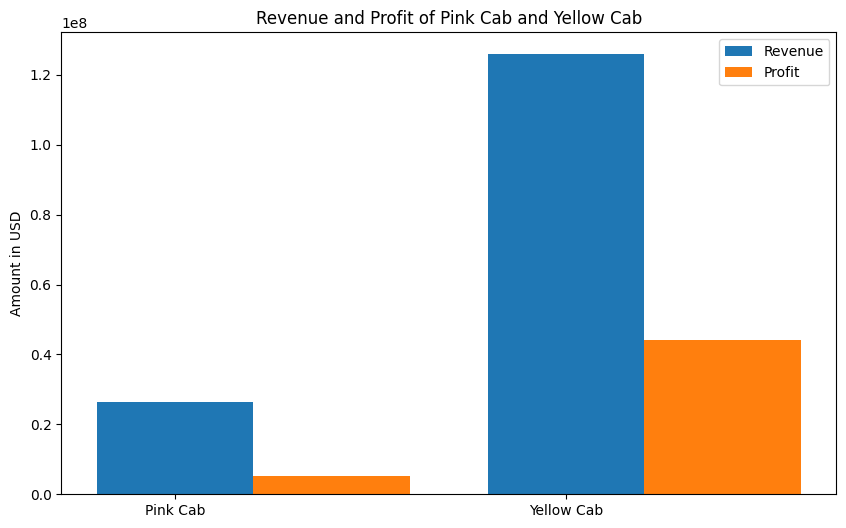

In [20]:
# Data
pink_cab_revenue = 26328251.33
pink_cab_profit = 5307328.321
yellow_cab_revenue = 125853887.19
yellow_cab_profit = 44020373.17079997

# Create the bar chart
labels = ['Pink Cab', 'Yellow Cab']
revenues = [pink_cab_revenue, yellow_cab_revenue]
profits = [pink_cab_profit, yellow_cab_profit]

x = range(len(labels))

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x, revenues, width=0.4, align='center', label='Revenue')
ax.bar([i+0.4 for i in x], profits, width=0.4, align='center', label='Profit')

plt.xticks(x, labels)
plt.ylabel('Amount in USD')
plt.title('Revenue and Profit of Pink Cab and Yellow Cab')
plt.legend()

plt.show()

# Bar chart for year wide revanue and profit

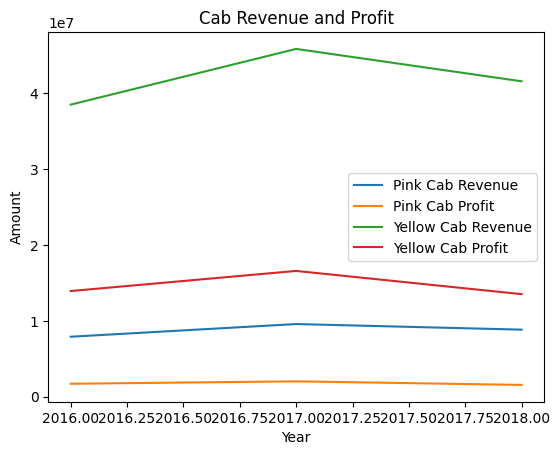

In [21]:
pink_revenue = [7908479.23, 9578629.54, 8841142.56]
pink_profit = [1713511.224, 2033654.908, 1560162.189]

# Data for Yellow Cab
yellow_revenue = [38481133.18, 45818910.04, 41553843.97]
yellow_profit = [1.392700e+07, 1.657598e+07, 1.351740e+07]

# Years
years = [2016, 2017, 2018]

# Create a line graph
plt.plot(years, pink_revenue, label='Pink Cab Revenue')
plt.plot(years, pink_profit, label='Pink Cab Profit')
plt.plot(years, yellow_revenue, label='Yellow Cab Revenue')
plt.plot(years, yellow_profit, label='Yellow Cab Profit')

# Add title and axis labels
plt.title('Cab Revenue and Profit')
plt.xlabel('Year')
plt.ylabel('Amount')

# Add a legend
plt.legend()

# Show the graph
plt.show()

# Profit margin

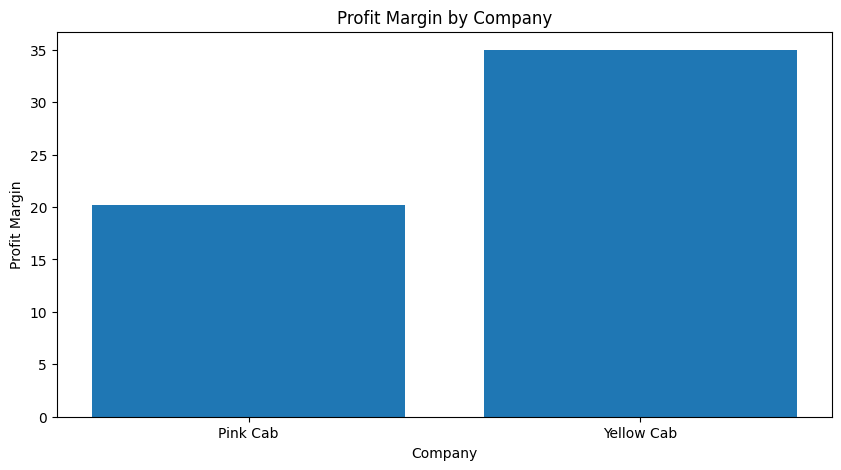

In [39]:
companies = ['Pink Cab', 'Yellow Cab']
profit_margins = [20.16, 34.98]
 
# Creating plot
fig = plt.figure(figsize=(10, 5))
 
# Create horizontal bars
plt.bar(companies, profit_margins)
 
# Add title and axis labels
plt.title('Profit Margin by Company')
plt.xlabel('Company')
plt.ylabel('Profit Margin')
 
# Show plot
plt.show()

# Bar chart for nummber of customer by gender

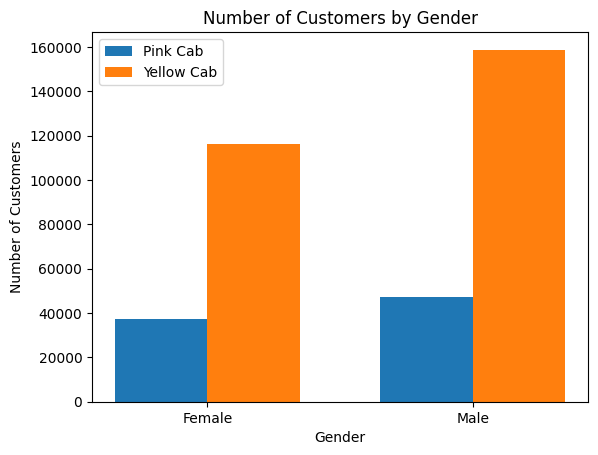

In [22]:
# Data for Pink Cab
pink_data = [37480, 47231]

# Data for Yellow Cab
yellow_data = [116000, 158681]

# Labels for x-axis
labels = ['Female', 'Male']

# Create bars
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
pink_bars = ax.bar(x - width/2, pink_data, width, label='Pink Cab')
yellow_bars = ax.bar(x + width/2, yellow_data, width, label='Yellow Cab')

# Add title and axis labels
ax.set_title('Number of Customers by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Customers')

# Add x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Add legend
ax.legend()

# Show the graph
plt.show()

# Bar chart for year wise distance covered

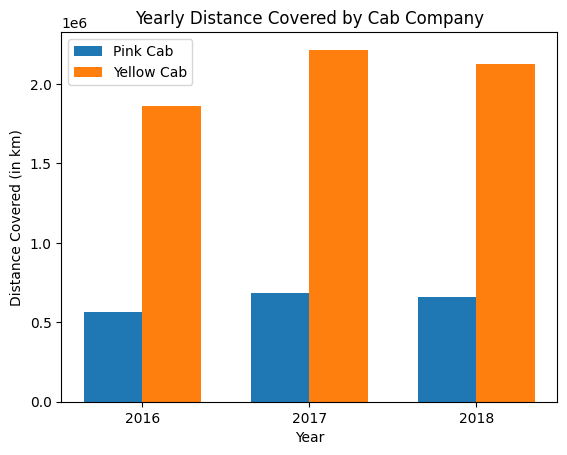

In [23]:
# Data for Pink Cab
pink_data = [563509.67, 685823.52, 661739.92]

# Data for Yellow Cab
yellow_data = [1859978.21, 2214879.02, 2124560.24]

# Labels for x-axis
labels = ['2016', '2017', '2018']

# Create bars
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
pink_bars = ax.bar(x - width/2, pink_data, width, label='Pink Cab')
yellow_bars = ax.bar(x + width/2, yellow_data, width, label='Yellow Cab')

# Add title and axis labels
ax.set_title('Yearly Distance Covered by Cab Company')
ax.set_xlabel('Year')
ax.set_ylabel('Distance Covered (in km)')

# Add x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Add legend
ax.legend()

# Show the graph
plt.show()

# Bar chart for customers covered by cab Companies

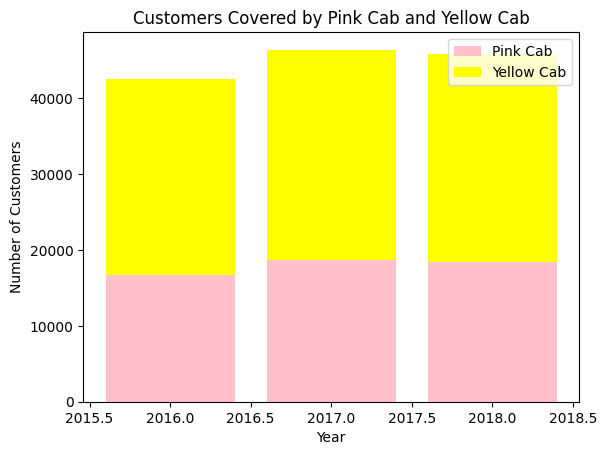

In [24]:
year = [2016, 2017, 2018]
pink_cab = [16661, 18643, 18400]
yellow_cab = [25937, 27789, 27470]

# Plot
plt.bar(year, pink_cab, label='Pink Cab', color='pink')
plt.bar(year, yellow_cab, label='Yellow Cab', color='yellow', bottom=pink_cab)

# Axis labels
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.title('Customers Covered by Pink Cab and Yellow Cab')

# Legend
plt.legend()

# Show plot
plt.show()


# Cab users by city

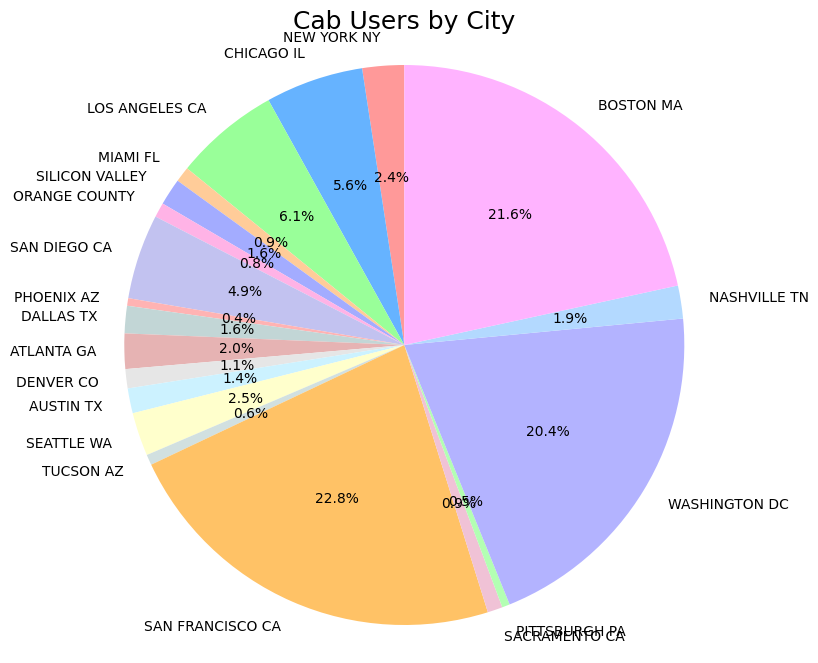

In [25]:
import matplotlib.pyplot as plt

# Data
labels = ['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL', 'SILICON VALLEY', 
          'ORANGE COUNTY', 'SAN DIEGO CA', 'PHOENIX AZ', 'DALLAS TX', 'ATLANTA GA',
          'DENVER CO', 'AUSTIN TX', 'SEATTLE WA', 'TUCSON AZ', 'SAN FRANCISCO CA', 
          'SACRAMENTO CA', 'PITTSBURGH PA', 'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA']
sizes = [3.59, 8.41, 9.04, 1.32, 2.31, 1.26, 7.30, 0.65, 2.35, 3.03, 1.65, 
         2.14, 3.73, 0.90, 33.93, 1.29, 0.67, 30.32, 2.83, 32.14]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#a3acff','#ffb3e6',
          '#c2c2f0','#ffb3b3','#c2d6d6','#e6b3b3','#e6e6e6','#ccf2ff',
          '#ffffcc','#d1e0e0','#ffc266','#f0c2d6','#b3ffb3','#b3b3ff',
          '#b3d9ff','#ffb3ff']

# Create pie chart
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Cab Users by City', fontsize=18)

# Show the chart
plt.show()

# Pink cab users by city barchart

C:\Users\Nabeel\AppData\Local\Temp\ipykernel_3624\3939640758.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pink_cab_users.keys(), rotation=90)


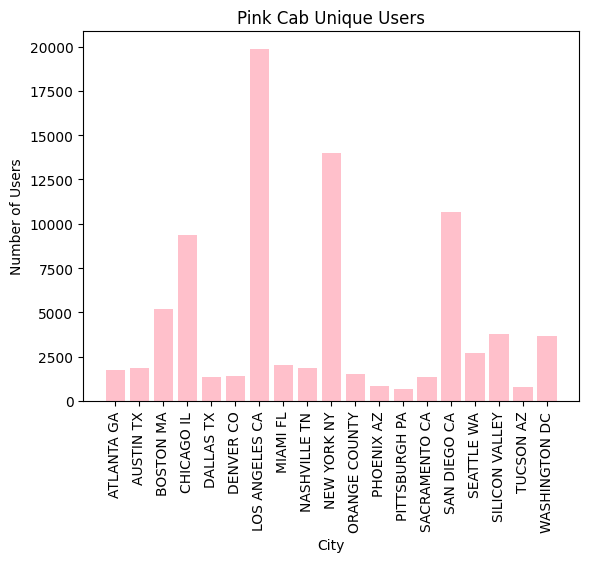

In [26]:
pink_cab_users = {
    'ATLANTA GA': 1762,
    'AUSTIN TX': 1868,
    'BOSTON MA': 5186,
    'CHICAGO IL': 9361,
    'DALLAS TX': 1380,
    'DENVER CO': 1394,
    'LOS ANGELES CA': 19865,
    'MIAMI FL': 2002,
    'NASHVILLE TN': 1841,
    'NEW YORK NY': 13967,
    'ORANGE COUNTY': 1513,
    'PHOENIX AZ': 864,
    'PITTSBURGH PA': 682,
    'SACRAMENTO CA': 1334,
    'SAN DIEGO CA': 10672,
    'SEATTLE WA': 2732,
    'SILICON VALLEY': 3797,
    'TUCSON AZ': 799,
    'WASHINGTON DC': 3692
}

# create bar chart for Pink Cab users
fig, ax = plt.subplots()
ax.bar(pink_cab_users.keys(), pink_cab_users.values(), color='pink')
ax.set_title('Pink Cab Unique Users')
ax.set_xlabel('City')
ax.set_ylabel('Number of Users')
ax.set_xticklabels(pink_cab_users.keys(), rotation=90)

plt.show()


# Yellow cab users by city barchart

C:\Users\Nabeel\AppData\Local\Temp\ipykernel_3624\150427454.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(yellow_cab_users.keys(), rotation=90)


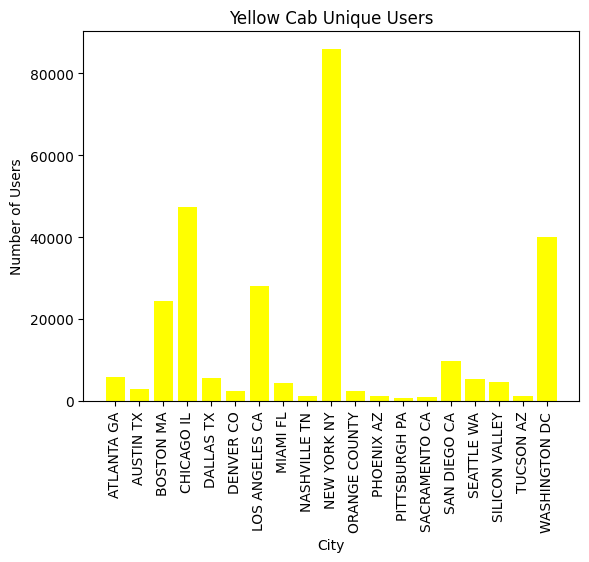

In [27]:
yellow_cab_users = {
    'ATLANTA GA': 5795,
    'AUSTIN TX': 3028,
    'BOSTON MA': 24506,
    'CHICAGO IL': 47264,
    'DALLAS TX': 5637,
    'DENVER CO': 2431,
    'LOS ANGELES CA': 28168,
    'MIAMI FL': 4452,
    'NASHVILLE TN': 1169,
    'NEW YORK NY': 85918,
    'ORANGE COUNTY': 2469,
    'PHOENIX AZ': 1200,
    'PITTSBURGH PA': 631,
    'SACRAMENTO CA': 1033,
    'SAN DIEGO CA': 9816,
    'SEATTLE WA': 5265,
    'SILICON VALLEY': 4722,
    'TUCSON AZ': 1132,
    'WASHINGTON DC': 40045
}

# create bar chart for Yellow Cab users
fig, ax = plt.subplots()
ax.bar(yellow_cab_users.keys(), yellow_cab_users.values(), color='yellow')
ax.set_title('Yellow Cab Unique Users')
ax.set_xlabel('City')
ax.set_ylabel('Number of Users')
ax.set_xticklabels(yellow_cab_users.keys(), rotation=90)

plt.show()


# Profit by seasons barchart

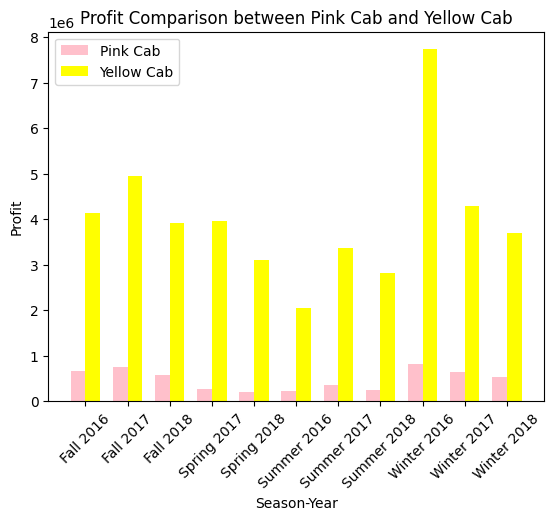

In [30]:
# Data
seasons = ['Fall 2016', 'Fall 2017', 'Fall 2018', 'Spring 2017', 'Spring 2018', 'Summer 2016', 'Summer 2017', 'Summer 2018', 'Winter 2016', 'Winter 2017', 'Winter 2018']
years = [2016, 2017, 2018, 2017, 2018, 2016, 2017, 2018, 2016, 2017, 2018]
profit_pink_cab = [669596.170, 755647.754, 575954.644, 272522.171, 209062.415, 228080.163, 361572.872, 252689.404, 815834.891, 643912.111, 522455.726]
profit_yellow_cab = [4.136139e+06, 4.956583e+06, 3.909493e+06, 3.961706e+06, 3.104921e+06, 2.057645e+06, 3.365564e+06, 2.806840e+06, 7.733212e+06, 4.292124e+06, 3.696146e+06]

# Set the bar width
bar_width = 0.35

# Set the positions of the x ticks
x_pos = np.arange(len(seasons))

# Create the figure and the axes
fig, ax = plt.subplots()

# Create a bar chart for Pink Cab and Yellow Cab profit
rects1 = ax.bar(x_pos - bar_width/2, profit_pink_cab, bar_width, label='Pink Cab', color='pink')
rects2 = ax.bar(x_pos + bar_width/2, profit_yellow_cab, bar_width, label='Yellow Cab', color='yellow')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Season-Year')
ax.set_ylabel('Profit')
ax.set_title('Profit Comparison between Pink Cab and Yellow Cab')
ax.set_xticks(x_pos)
ax.set_xticklabels(seasons, rotation=45) # Rotate the x labels by 45 degrees
ax.legend()

plt.show()

# Distance covered by seasons

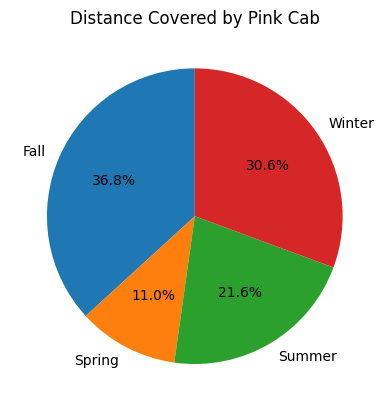

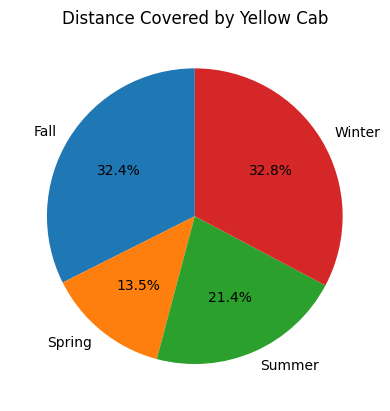

In [32]:
seasons = ['Fall', 'Spring', 'Summer', 'Winter']
distance_pink_cab = [703116.49, 210064.92, 412335.94, 585555.76]
distance_yellow_cab = [2009161.09, 834005.44, 1325661.99, 2030588.95]

# Create a pie chart for Pink Cab
fig, ax = plt.subplots()
ax.pie(distance_pink_cab, labels=seasons, autopct='%1.1f%%', startangle=90)
ax.set_title('Distance Covered by Pink Cab')

# Create a pie chart for Yellow Cab
fig, ax = plt.subplots()
ax.pie(distance_yellow_cab, labels=seasons, autopct='%1.1f%%', startangle=90)
ax.set_title('Distance Covered by Yellow Cab')

plt.show()


# Average customer distance and profit

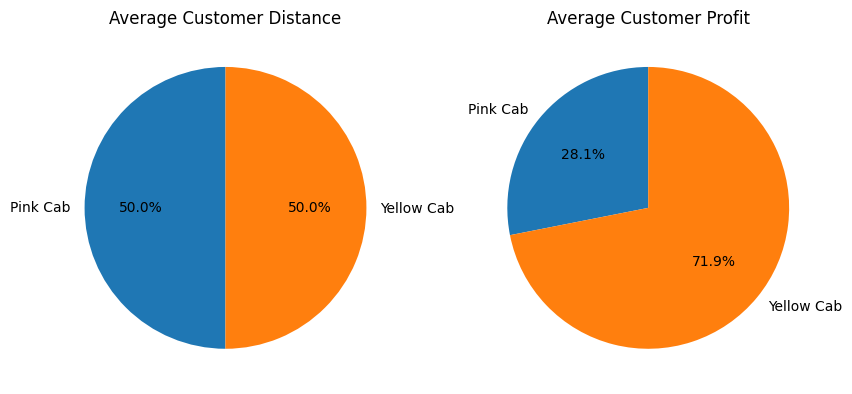

In [33]:
avg_distance = [22.56, 22.57]
avg_profit = [62.65, 160.26]
labels = ['Pink Cab', 'Yellow Cab']

# create pie chart for average customer distance
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].pie(avg_distance, labels=labels, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Average Customer Distance')

# create pie chart for average customer profit
ax[1].pie(avg_profit, labels=labels, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Average Customer Profit')

plt.show()

# Cab users by city

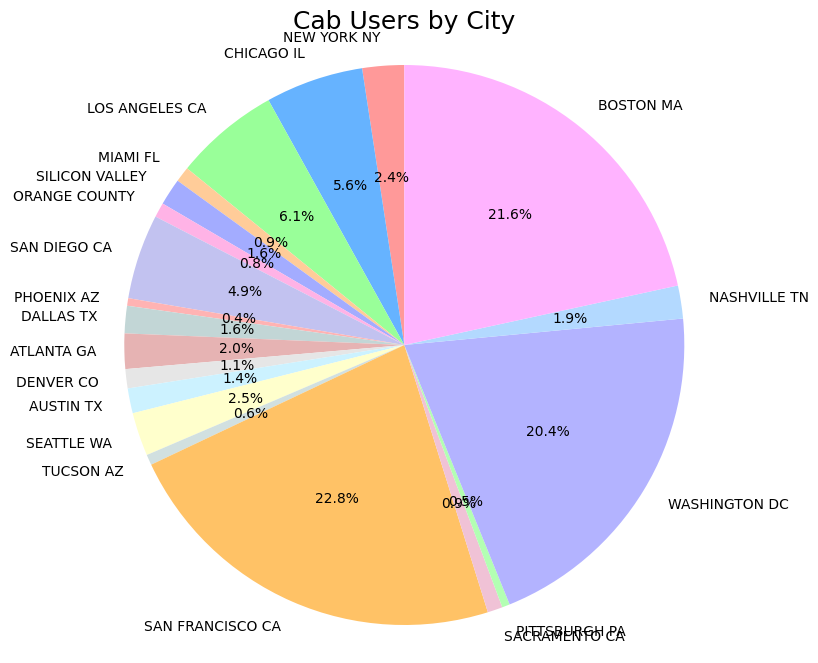

In [34]:
labels = ['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL', 'SILICON VALLEY', 
          'ORANGE COUNTY', 'SAN DIEGO CA', 'PHOENIX AZ', 'DALLAS TX', 'ATLANTA GA',
          'DENVER CO', 'AUSTIN TX', 'SEATTLE WA', 'TUCSON AZ', 'SAN FRANCISCO CA', 
          'SACRAMENTO CA', 'PITTSBURGH PA', 'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA']
sizes = [3.59, 8.41, 9.04, 1.32, 2.31, 1.26, 7.30, 0.65, 2.35, 3.03, 1.65, 
         2.14, 3.73, 0.90, 33.93, 1.29, 0.67, 30.32, 2.83, 32.14]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#a3acff','#ffb3e6',
          '#c2c2f0','#ffb3b3','#c2d6d6','#e6b3b3','#e6e6e6','#ccf2ff',
          '#ffffcc','#d1e0e0','#ffc266','#f0c2d6','#b3ffb3','#b3b3ff',
          '#b3d9ff','#ffb3ff']

# Create pie chart
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Cab Users by City', fontsize=18)

# Show the chart
plt.show()

# Hypothesis 01: Is there any difference in profit by gender

In [36]:
merged_df = pd.merge(TranID, customerID, on='Customer ID')
merged_df = pd.merge(merged_df, cabdata, on='Transaction ID')

# Filter transactions of Pink Cab
pink_cab_df = merged_df[merged_df['Company'] == 'Pink Cab']

# Group the data by gender and sum up the price charged and cost of trip for each group
gender_wise_df = pink_cab_df.groupby('Gender').agg({'Price Charged': 'sum', 'Cost of Trip': 'sum'})

# Calculate profit for each gender
gender_wise_df['Profit'] = gender_wise_df['Price Charged'] - gender_wise_df['Cost of Trip']

# Calculate the difference in profit between the genders
profit_diff = gender_wise_df.loc['Male', 'Profit'] - gender_wise_df.loc['Female', 'Profit']

print("Difference in profit between genders: ", profit_diff)

Difference in profit between genders:  646262.9390000012


YES.Male Customers providing more profit share than female customers

# Hypothesis 02: is there any difference in profit based on ride distance

In [37]:
merged_df = pd.merge(TranID, customerID, on='Customer ID')
merged_df = pd.merge(merged_df, cabdata, on='Transaction ID')

# Filter transactions of Pink Cab
pink_cab_df = merged_df[merged_df['Company'] == 'Pink Cab']

# Calculate profit per km
pink_cab_df['Profit per KM'] = (pink_cab_df['Price Charged'] - pink_cab_df['Cost of Trip']) / pink_cab_df['KM Travelled']

# Group the data by distance traveled and calculate the average profit per km
distance_wise_df = pink_cab_df.groupby(pd.cut(pink_cab_df['KM Travelled'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])).agg({'Profit per KM': 'mean'})

# Calculate the average profit for long-range distances (above 50 KM) and short-range distances (below or equal to 50 KM)
long_range_profit_avg = pink_cab_df[pink_cab_df['KM Travelled'] > 30]['Profit per KM'].mean()
short_range_profit_avg = pink_cab_df[pink_cab_df['KM Travelled'] <= 30]['Profit per KM'].mean()

# Compare the average profit for long-range and short-range distances
if long_range_profit_avg > short_range_profit_avg:
    print("On average, Pink Cab generates higher profit per KM for long-range distances.")
elif long_range_profit_avg < short_range_profit_avg:
    print("On average, Pink Cab generates higher profit per KM for short-range distances.")
else:
    print("On average, Pink Cab generates the same profit per KM for long-range and short-range distances.")

On average, Pink Cab generates higher profit per KM for long-range distances.


C:\Users\Nabeel\AppData\Local\Temp\ipykernel_3624\2463807794.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pink_cab_df['Profit per KM'] = (pink_cab_df['Price Charged'] - pink_cab_df['Cost of Trip']) / pink_cab_df['KM Travelled']


# Hypothesis 03: is there any difference in profit by payment mode

In [38]:
# Merge the dataframes
merged_df = pd.merge(TranID, customerID, on='Customer ID')
merged_df = pd.merge(merged_df, cabdata, on='Transaction ID')


merged_df['Profit'] = merged_df['Price Charged'] - merged_df['Cost of Trip']

# Group the merged dataframe by payment mode
payment_mode_groups = merged_df.groupby('Payment_Mode')

# Calculate the average profit for each payment mode group
payment_mode_profit = payment_mode_groups['Profit'].mean()

# Print the average profit for card and cash payment modes
print("Average profit for card payment mode:", payment_mode_profit['Card'])
print("Average profit for cash payment mode:", payment_mode_profit['Cash'])

Average profit for card payment mode: 137.08646100025985
Average profit for cash payment mode: 137.5029244996108


In [ ]:
No, not at all. very small difference